In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.optimize as sco
import scipy.constants as c
import scipy.integrate as sci
from scipy.optimize import curve_fit as cf
import pandas as pd

In [2]:
# Brechungsindex
n=1.37927
# Laserwellenlänge
wavelen=532e-9
# Umrechnung ins grad Maß
gamma= np.pi/180 

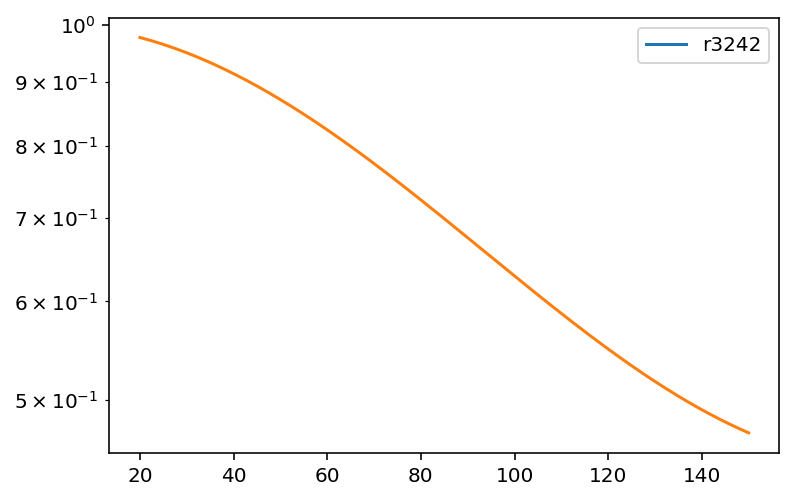

In [3]:
import scipy.special as ssss
def p(q,a):
    return 9 * ( np.sin(q*a) - (q*a)* np.cos(q*a) )**2 /  (q*a)**6
def gauss(x,m,sig):
    return np.exp(-(x-m)**2/2/sig**2) / np.sqrt(2*np.pi*sig**2)
def integral(q,m,sig):
    results=[]
    for i in range(len(q)):
        q0= q[i]
        def c(a): 
            return p(q0,a) * gauss(a,m,sig)
        results.append(sci.quad(c, 0,np.inf)[0] )
    return results

winkel=np.linspace(20,150,1000)
q=4*np.pi*n/wavelen * np.sin( winkel *gamma /2)

fig,ax=plt.subplots(dpi=144)
ax.plot(winkel,integral(q,60e-9,5e-9),label="r3242")
ax.plot(winkel,p(q,60e-9))
ax.set(yscale="log")
ax.legend();

In [4]:
def formfaktor(winkel,a,amp=1):
    #winkel=winkel+offset
    q=4*np.pi*n/wavelen * np.sin( winkel *gamma /2)
    
    return 9 * ( np.sin(q*a) - (q*a)* np.cos(q*a) )**2 /  (q*a)**6 *amp

def formfaktorQ(q,a,amp=1):
    return 9 * ( np.sin(q*a) - (q*a)* np.cos(q*a) )**2 /  (q*a)**6 *amp

# Funktion funktioniert für yscale="log" bei ca. a=500nm

In [5]:
winkel=np.linspace(0,150,1000)
Q=np.linspace(5e-10,1e-9,1000)
"""fig,ax=plt.subplots(dpi=144)
ax.plot(winkel, formfaktor(winkel,200e-9,amp=1),label="test \n lol {:f}".format(0.002340000000245564))
ax.legend()"""
#ax.set(yscale="log");


'fig,ax=plt.subplots(dpi=144)\nax.plot(winkel, formfaktor(winkel,200e-9,amp=1),label="test \n lol {:f}".format(0.002340000000245564))\nax.legend()'

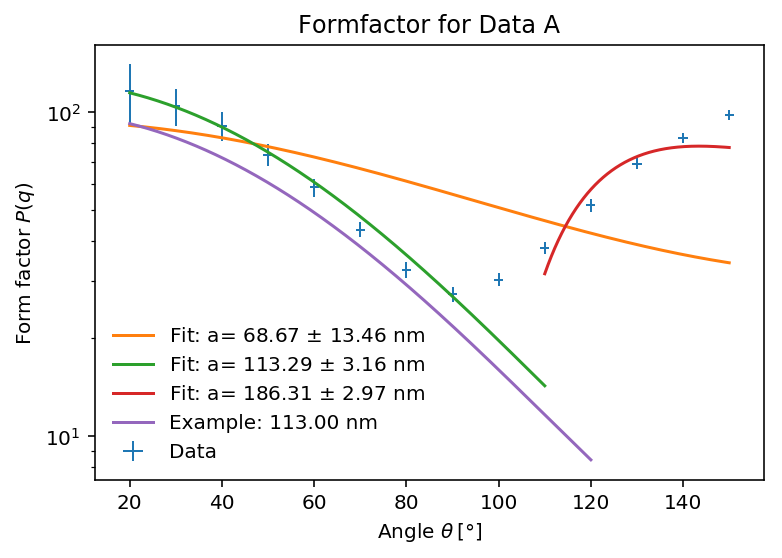

In [6]:
angles=[]
meanI=[]
dmeanI=[]

for x in range(2,16):
    name="Data/A/{}.ASC".format(x*10)
    angles.append(x*10)
    data=np.genfromtxt(name,skip_header=16,delimiter="\t",filling_values=-1,comments="\"")
    I=data[183:,1]
    I*=np.sin(gamma*x*10) # Winkelkorrektur
    
    meanI.append(np.mean(I))
    dmeanI.append(np.std(I))

#meanI=[y/np.max(meanI) for y in meanI] # Normierung auf die größte Intensität
#
# WIE SOLL MAN DAS RICHTIG NORMIEREN ???
# 
# Datapoints for fitting
start=9
stop=-1

fig,ax=plt.subplots(dpi=144)
ax.errorbar(angles, meanI ,label="Data",xerr=1,yerr=dmeanI, marker="",ls="",lw=1)

def fit_mi_shit(start,stop,a):
    popt,pcov=cf(formfaktor, angles[start:stop], meanI[start:stop], p0=(200e-9,a))
    perr = np.sqrt(np.diag(pcov))

    q=np.linspace(angles[start],angles[stop],1000)
    ax.plot(q, formfaktor(q,*popt) ,label="Fit: a= {:.2f} $\pm$ {:.2f} nm".format(abs(popt[0])*1e9,abs(perr[0])*1e9))

fit_mi_shit(0,-1,30)
fit_mi_shit(0,9,30)
fit_mi_shit(9,-1,30)

"""for i in np.linspace(35e-9,180e-9,2):
    ax.plot(q, formfaktor(q,i,100) ,label="Testwert: {:.2f} nm".format(i/1e-9,popt[0]*1e9,perr[0]*1e9))
"""
q=np.linspace(angles[0],120,1000)
ax.plot(q, formfaktor(q,113e-9,100) ,label="Example: {:.2f} nm".format(113) )
ax.set(xlabel=r"Angle $\theta \: [°]$", ylabel="Form factor $P(q)$", title="Formfactor for Data A",yscale="log")

ax.legend(frameon=False)
fig.savefig("Plots/FormA");

anglesA,meanIA,dmeanIA = angles,meanI,dmeanI

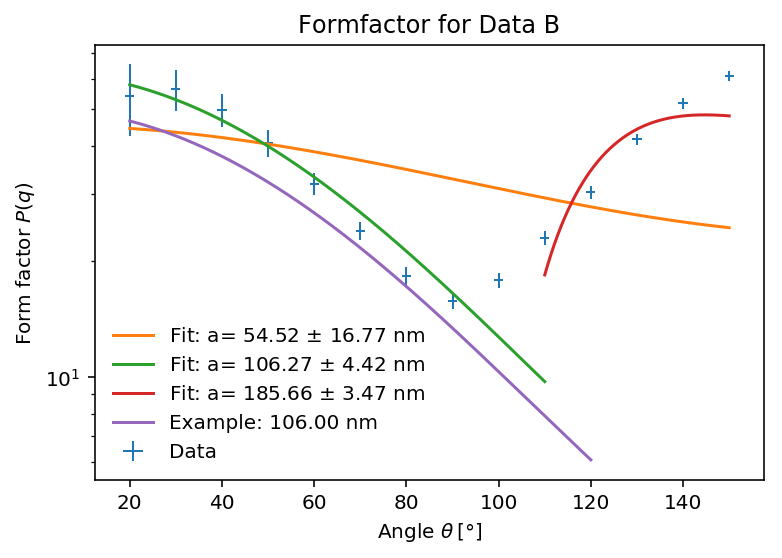

In [33]:
angles=[]
meanI=[]
dmeanI=[]

for x in range(2,16):
    name="Data/B/{}.ASC".format(x*10)
    angles.append(x*10)
    data=np.genfromtxt(name,skip_header=16,delimiter="\t",filling_values=-1,comments="\"")
    I=data[183:,1]
    I*=np.sin(gamma*x*10) # Winkelkorrektur
    
    meanI.append(np.mean(I))
    dmeanI.append(np.std(I))
    
fig,ax=plt.subplots(dpi=144)
ax.errorbar(angles, meanI ,label="Data",xerr=1,yerr=dmeanI, marker="",ls="",lw=1)
    
fit_mi_shit(0,-1,60)
fit_mi_shit(0,9,30)
fit_mi_shit(9,-1,100)

"""for i in np.linspace(35e-9,180e-9,2):
    ax.plot(q, formfaktor(q,i,100) ,label="Testwert: {:.2f} nm".format(i/1e-9,popt[0]*1e9,perr[0]*1e9))
"""
q=np.linspace(angles[0],120,1000)
ax.plot(q, formfaktor(q,106e-9,50) ,label="Example: {:.2f} nm".format(106) )
ax.set(xlabel=r"Angle $\theta \: [°]$", ylabel="Form factor $P(q)$", title="Formfactor for Data B",yscale="log")

ax.legend(frameon=False)
fig.savefig("Plots/FormB");

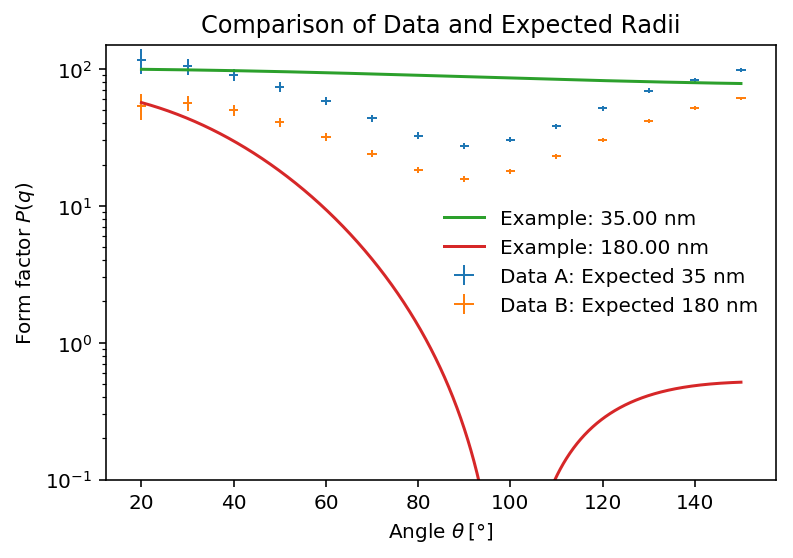

In [40]:
winkel=np.linspace(20,150,1000)

fig, ax=plt.subplots(dpi=144)
ax.errorbar(anglesA, meanIA ,label="Data A: Expected 35 nm ",xerr=1,yerr=dmeanIA, marker="",ls="",lw=1)
ax.errorbar(angles, meanI ,label="Data B: Expected 180 nm",xerr=1,yerr=dmeanI, marker="",ls="",lw=1)

ax.plot(winkel,formfaktor(winkel,35e-9,100),label="Example: {:.2f} nm".format(35))
ax.plot(winkel,formfaktor(winkel,180e-9,70),label="Example: {:.2f} nm".format(180))

ax.set(xlabel=r"Angle $\theta \: [°]$", ylabel="Form factor $P(q)$", title="Comparison of Data and Expected Radii",
       yscale="log",ylim=[1e-1,150])
ax.legend(frameon=False)
fig.savefig("Plots/Comparison.png");

In [ ]:
# ODR 
import scipy.odr as odr
def formfaktor2(B, winkel):
    a,amp=B[0],B[1]
    q=4*np.pi*n/wavelen * np.sin( winkel *gamma /2)
    return 9 * ( np.sin(q*a) - (q*a)* np.cos(q*a) )**2 /  (q*a)**6 *amp

# Funktion funktioniert für yscale="log" bei ca. a=500nm
angles=[]
meanI=[]
dmeanI=[]

for x in range(2,16):
    name="Data/A/{}.ASC".format(x*10)
    angles.append(x*10)
    data=np.genfromtxt(name,skip_header=16,delimiter="\t",filling_values=-1,comments="\"")
    I=data[183:,1]
    I*=np.sin(gamma*x*10) # Winkelkorrektur
    meanI.append(np.mean(I))
    dmeanI.append(np.std(I))
    
start,stop=0,9

linear = odr.Model(formfaktor2)
mydata = odr.RealData(meanI[start:stop], angles[start:stop], sx=dmeanI, sy=1)
myodr = odr.ODR(mydata, linear, beta0=[1e-9,100])
myoutput = myodr.run()
beta=myoutput.beta
dbeta= myoutput.sd_beta
myoutput.pprint()

plotting=np.linspace(20,150,1000)
fig,ax=plt.subplots(dpi=144)
ax.plot(plotting,formfaktor2(beta,plotting))
ax.plot(angles,meanI,label="data")
ax.set(yscale="log")
ax.legend();

In [ ]:
zahlen=[[4.3235265,.2354234],[2342.234234,1.235345],"wau"]

#string=["{:.2f}".format(x) for x in zahlen]